# Tech Challenge - Fase 3 (Big Data)
**Integrantes do grupo 43**
- Gabriel Tomaz
- Pedro Costa
- Thiago Aragão

# Introdução
A pandemia da COVID-19 trouxe desafios significativos para a saúde pública, exigindo análises detalhadas sobre o comportamento da população e seus impactos sociais e econômicos. Este trabalho tem como objetivo explorar os dados da PNAD-COVID-19, focando nas características clínicas dos sintomas, condições econômicas e padrões comportamentais da população durante a pandemia. A análise dessas informações fornecerá indicadores importantes para o planejamento de ações de saúde pública, auxiliando instituições como hospitais a se prepararem para possíveis novos surtos da doença.

# Ferramentas utilizadas
Para a realização da análise dos dados da PNAD-COVID-19, utilizamos o Visual Studio Code como ambiente de desenvolvimento, proporcionando uma interface prática para a escrita e execução do código. O Apache Spark foi utilizado para processamento eficiente de grandes volumes de dados, permitindo manipulação e consultas rápidas. As bibliotecas Pandas e Seaborn foram fundamentais para a manipulação dos dados e visualização gráfica, respectivamente, garantindo análises estatísticas detalhadas e representações visuais claras dos padrões observados.

# Importação da base de dados
O bloco de código abaixo importa três bibliotecas essenciais para análise de dados: SparkSession do PySpark, que permite criar sessões para processar grandes volumes de dados de forma distribuída; Seaborn, uma biblioteca de visualização de dados, que simplifica a criação de gráficos estatísticos elegantes e visualmente agradáveis, com foco na estética e no suporte a dados categóricos e contínuos; e Matplotlib.pyplot, usada para personalizar e exibir gráficos, complementando o Seaborn na geração de visualizações detalhadas e personalizadas.

In [1]:
from pyspark.sql import SparkSession
import seaborn as sns
import matplotlib.pyplot as plt

No bloco de código abaixo, é criado uma sessão Spark chamada "PNAD" permitindo o uso do Spark para processar e analisar dados.

In [2]:
spark = SparkSession.builder.appName("PNAD").getOrCreate()

No bloco de código abaixo, são importadas as bases de dados da PNAD, que estão no formato CSV, correspondentes a três meses: setembro, outubro e novembro de 2020.

In [3]:
df_2020_setembro = spark.read.csv('PNAD_COVID_092020.csv', header=True, inferSchema=True)
df_2020_outubro  = spark.read.csv('PNAD_COVID_102020.csv', header=True, inferSchema=True)
df_2020_novembro = spark.read.csv('PNAD_COVID_112020.csv', header=True, inferSchema=True)

No bloco de código abaixo, é realizada uma análise da quantidade de colunas e linhas das bases de dados. Pode-se observar que o mês de novembro possui mais colunas do que os meses de setembro e outubro.

In [4]:
print("Qtd Linhas: " + str(df_2020_setembro.count()) + " | Qtd Colunas setembro: " + str(len(df_2020_setembro.columns)))
print("Qtd Linhas: " + str(df_2020_outubro.count())  + " | Qtd Colunas outubro:  " + str(len(df_2020_outubro.columns)))
print("Qtd Linhas: " + str(df_2020_novembro.count()) + " | Qtd Colunas novembro: " + str(len(df_2020_novembro.columns)))

Qtd Linhas: 387298 | Qtd Colunas setembro: 145
Qtd Linhas: 380461 | Qtd Colunas outubro:  145
Qtd Linhas: 381438 | Qtd Colunas novembro: 148


No bloco de código abaixo, analisamos as bases de dados para ver quais colunas são diferentes entre os meses. Podemos notar que apenas o mês de novembro tem colunas diferentes em comparação a setembro e outubro.

In [5]:
a = set(df_2020_setembro.columns)
b = set(df_2020_outubro.columns)
c = set(df_2020_novembro.columns)

print("Diferença entre setembro e outubro  " + str(a - b))
print("Diferença entre outubro e setembro  " + str(b - a))
print("Diferença entre outubro e novembro  " + str(b - c))
print("Diferença entre novembro e outubro  " + str(c - b))
print("Diferença entre setembro e novembro " + str(a - c))
print("Diferença entre novembro e setembro " + str(c - a))

Diferença entre setembro e outubro  set()
Diferença entre outubro e setembro  set()
Diferença entre outubro e novembro  set()
Diferença entre novembro e outubro  {'A007A', 'A006A', 'A006B'}
Diferença entre setembro e novembro set()
Diferença entre novembro e setembro {'A007A', 'A006A', 'A006B'}



Ao analisar o dicionário de dados do PNAD, decidimos que não utilizaríamos essas informações na análise. Concluímos, então, que seria melhor excluir as colunas, já que temos dados disponíveis apenas para um mês.

In [6]:
df_2020_novembro = df_2020_novembro.drop('A006A', 'A006B', 'A007A')

No bloco de código abaixo, realizamos a união dos DataFrames no Spark e exibimos os primeiros 20 registros.

In [7]:
df = df_2020_setembro.union(df_2020_outubro).union(df_2020_novembro)
df.show()

+----+---+-------+-------+-----+-----+-----+-----+-------+---------+-----+-----+------+------------+------------+------+----+-----+------+------+------+----+----+----+----+----+----+----+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+------+------+------+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+----+----+----+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+----+----+----+----+----+----+-----+-----+-----+----+----+-----+-----+-----+-----+-----+------+------+-----+----+----+-----+----+-----+------+------+-----+------+------+-----+-----+-----+------+-------+-------+------+-------+-------+----+----+----+----+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+----+-----+-----+-----+-----+----+-----+-----+------+------+------+------+------+-----+----+
| Ano| UF|CAPITAL|RM_RIDE|V1008|V1012|V1013|V1016|Estrato|      UPA|V1022|V1023| V1030|       V1031|       V10

No bloco de código abaixo, é criada uma view temporária chamada "PNAD_COVID" para permitir consultas SQL no DataFrame.

In [8]:
df.createOrReplaceTempView("PNAD_COVID")

No bloco de código abaixo, é exibida a quantidade de colunas e linhas após a união dos DataFrames.

In [9]:
print("Qtd linhas: " + str(df.count()))
print("Qtd colunas: " + str(len(df.columns)))

Qtd linhas: 1149197
Qtd colunas: 145


## Características Clínicas dos Sintomas

### Frequência dos sintomas mais comuns relatados na população.

In [10]:
frequencia_sintomas = spark.sql("""
        SELECT *
        FROM (
            (SELECT 'Febre' AS DESCRICAO                       , COUNT(B0011)  AS QTD FROM PNAD_COVID WHERE B0011  = 1) UNION
            (SELECT 'Tosse' AS DESCRICAO                       , COUNT(B0012)  AS QTD FROM PNAD_COVID WHERE B0012  = 1) UNION
            (SELECT 'Dor de garganta' AS DESCRICAO             , COUNT(B0013)  AS QTD FROM PNAD_COVID WHERE B0013  = 1) UNION
            (SELECT 'Dificuldade para respirar' AS DESCRICAO   , COUNT(B0014)  AS QTD FROM PNAD_COVID WHERE B0014  = 1) UNION
            (SELECT 'Dor de cabeça' AS DESCRICAO               , COUNT(B0015)  AS QTD FROM PNAD_COVID WHERE B0015  = 1) UNION
            (SELECT 'Dor no peito' AS DESCRICAO                , COUNT(B0016)  AS QTD FROM PNAD_COVID WHERE B0016  = 1) UNION
            (SELECT 'Náusea' AS DESCRICAO                      , COUNT(B0017)  AS QTD FROM PNAD_COVID WHERE B0017  = 1) UNION
            (SELECT 'Nariz entupido ou escorrendo' AS DESCRICAO, COUNT(B0018)  AS QTD FROM PNAD_COVID WHERE B0018  = 1) UNION
            (SELECT 'Fadiga' AS DESCRICAO                      , COUNT(B0019)  AS QTD FROM PNAD_COVID WHERE B0019  = 1) UNION
            (SELECT 'Dor nos olhos' AS DESCRICAO               , COUNT(B00110) AS QTD FROM PNAD_COVID WHERE B00110 = 1) UNION
            (SELECT 'Perda de cheiro ou sabor' AS DESCRICAO    , COUNT(B00111) AS QTD FROM PNAD_COVID WHERE B00111 = 1) UNION
            (SELECT 'Dor muscular' AS DESCRICAO                , COUNT(B00112) AS QTD FROM PNAD_COVID WHERE B00112 = 1) UNION
            (SELECT 'Diarreia' AS DESCRICAO                    , COUNT(B00113) AS QTD FROM PNAD_COVID WHERE B00113 = 1)
        )
        ORDER BY QTD DESC
    """)
frequencia_sintomas.show(truncate=False)

+----------------------------+-----+
|DESCRICAO                   |QTD  |
+----------------------------+-----+
|Dor de cabeça               |18960|
|Nariz entupido ou escorrendo|16140|
|Tosse                       |15373|
|Dor de garganta             |12557|
|Dor muscular                |10883|
|Febre                       |9020 |
|Fadiga                      |8208 |
|Dificuldade para respirar   |4799 |
|Perda de cheiro ou sabor    |4413 |
|Diarreia                    |4301 |
|Náusea                      |3958 |
|Dor nos olhos               |3671 |
|Dor no peito                |3448 |
+----------------------------+-----+



No bloco de código abaixo, é convertido um DataFrame Spark em pandas, seleciona os 3 sintomas mais frequentes, e cria um gráfico de barras com Seaborn para exibir a quantidade de ocorrências por descrição dos sintomas.

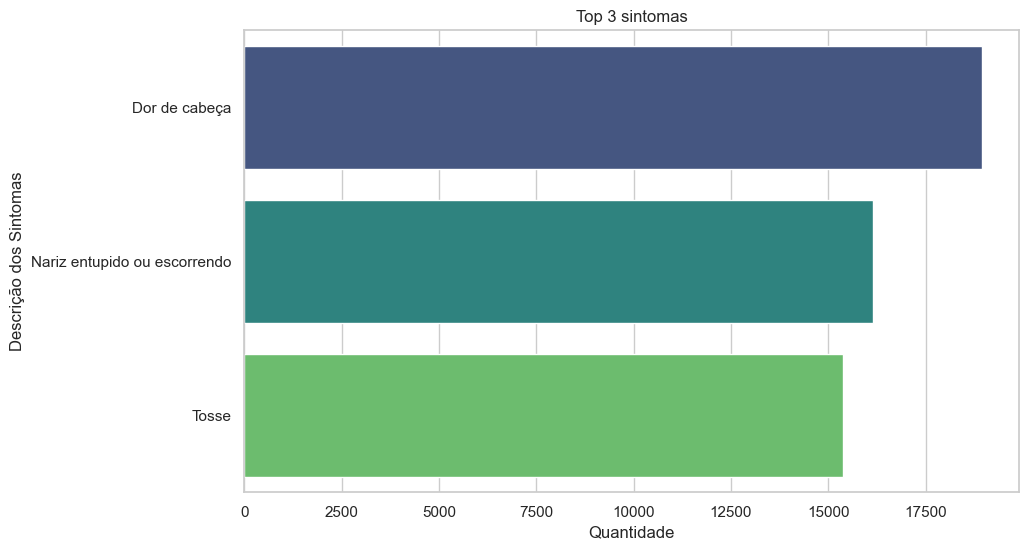

In [11]:
df_pandas = frequencia_sintomas.toPandas()
df_pandas = df_pandas.nlargest(3, 'QTD')

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
# Atribuindo a variável 'DESCRICAO' ao hue e removendo a legenda
sns.barplot(x='QTD', y='DESCRICAO', data=df_pandas, hue='DESCRICAO', palette='viridis')

plt.title('Top 3 sintomas')
plt.xlabel('Quantidade')
plt.ylabel('Descrição dos Sintomas')

plt.show()

### Proporção de pessoas que apresentaram múltiplos sintomas.

In [12]:
pessoas_multiplos_sintomas = spark.sql("""
        SELECT COUNT(*) AS QTD
        FROM PNAD_COVID
        WHERE
            (
                CASE WHEN B0011  = 1 THEN 1 ELSE 0 END +
                CASE WHEN B0012  = 1 THEN 1 ELSE 0 END +
                CASE WHEN B0013  = 1 THEN 1 ELSE 0 END +
                CASE WHEN B0014  = 1 THEN 1 ELSE 0 END +
                CASE WHEN B0015  = 1 THEN 1 ELSE 0 END +
                CASE WHEN B0016  = 1 THEN 1 ELSE 0 END +
                CASE WHEN B0017  = 1 THEN 1 ELSE 0 END +
                CASE WHEN B0018  = 1 THEN 1 ELSE 0 END +
                CASE WHEN B0019  = 1 THEN 1 ELSE 0 END +
                CASE WHEN B00110 = 1 THEN 1 ELSE 0 END +
                CASE WHEN B00111 = 1 THEN 1 ELSE 0 END +
                CASE WHEN B00112 = 1 THEN 1 ELSE 0 END +
                CASE WHEN B00113 = 1 THEN 1 ELSE 0 END
            ) >= 2
    """)

pessoas_unico_sintomas = spark.sql("""
        SELECT COUNT(*) AS QTD
        FROM PNAD_COVID
        WHERE
            (
                CASE WHEN B0011  = 1 THEN 1 ELSE 0 END +
                CASE WHEN B0012  = 1 THEN 1 ELSE 0 END +
                CASE WHEN B0013  = 1 THEN 1 ELSE 0 END +
                CASE WHEN B0014  = 1 THEN 1 ELSE 0 END +
                CASE WHEN B0015  = 1 THEN 1 ELSE 0 END +
                CASE WHEN B0016  = 1 THEN 1 ELSE 0 END +
                CASE WHEN B0017  = 1 THEN 1 ELSE 0 END +
                CASE WHEN B0018  = 1 THEN 1 ELSE 0 END +
                CASE WHEN B0019  = 1 THEN 1 ELSE 0 END +
                CASE WHEN B00110 = 1 THEN 1 ELSE 0 END +
                CASE WHEN B00111 = 1 THEN 1 ELSE 0 END +
                CASE WHEN B00112 = 1 THEN 1 ELSE 0 END +
                CASE WHEN B00113 = 1 THEN 1 ELSE 0 END
            ) = 1
    """)
total_pessoas = df.count()
print(f'Total de pessoas: {total_pessoas}')

total_pessoas_multiplos_sintomas = pessoas_multiplos_sintomas.select("QTD").first()['QTD']
print(f'Total pessoas multiplos sintomas: {total_pessoas_multiplos_sintomas}')

total_pessoas_unico_sintomas = pessoas_unico_sintomas.select("QTD").first()['QTD']
print(f'Total pessoas unico sintomas: {total_pessoas_unico_sintomas}')

proporcao_multiplos = total_pessoas_multiplos_sintomas / total_pessoas
print(f'Proporção de pessoas com múltiplos sintomas: {proporcao_multiplos:.2%}')

proporcao_multiplos = total_pessoas_unico_sintomas / total_pessoas
print(f'Proporção de pessoas com unico sintomas: {proporcao_multiplos:.2%}')

Total de pessoas: 1149197
Total pessoas multiplos sintomas: 25513
Total pessoas unico sintomas: 19437
Proporção de pessoas com múltiplos sintomas: 2.22%
Proporção de pessoas com unico sintomas: 1.69%


Podemos observar que foram entrevistadas **1.149.197** pessoas. Destas, **25.513** apresentaram múltiplos sintomas, o que equivale a **2,22%** do total. Além disso, **19.437** pessoas relataram um único sintoma, representando **1,69%** da amostra. Esses dados mostram que a maioria da população não apresentou sintomas significativos.

### Comparação dos sintomas entre diferentes faixas etárias e regiões do Brasil.

In [13]:
comparacao_sintomas_enntre_faixa_etaria = spark.sql("""
        SELECT  
            CASE
                WHEN A002 BETWEEN 0 AND 12 THEN '0-12 anos'
                WHEN A002 BETWEEN 13 AND 18 THEN '13-18 anos'
                WHEN A002 BETWEEN 19 AND 29 THEN '19-29 anos'
                WHEN A002 BETWEEN 30 AND 59 THEN '30-59 anos'
                ELSE '60 anos ou mais'
            END AS FAIXA_ETARIA,
            CASE 
                WHEN UF IN (11, 12, 13, 14, 15, 16, 17) THEN 'Norte'
                WHEN UF IN (21, 22, 23, 24, 25, 26, 27, 28, 29) THEN 'Nordeste'
                WHEN UF IN (31, 32, 33, 35) THEN 'Sudeste'
                WHEN UF IN (41, 42, 43) THEN 'Sul'
                WHEN UF IN (50, 51, 52, 53) THEN 'Centro-Oeste'
                ELSE 'Outra'
            END AS REGIAO,
            COUNT(CASE WHEN B0011  = 1 THEN 1 END) AS FEBRE_SIM,
            COUNT(CASE WHEN B0011  = 2 THEN 1 END) AS FEBRE_NAO,
            COUNT(CASE WHEN B0012  = 1 THEN 1 END) AS TOSSE_SIM,
            COUNT(CASE WHEN B0012  = 2 THEN 1 END) AS TOSSE_NAO,
            COUNT(CASE WHEN B0013  = 1 THEN 1 END) AS DOR_GARGANTA_SIM,
            COUNT(CASE WHEN B0013  = 2 THEN 1 END) AS DOR_GARGANTA_NAO,
            COUNT(CASE WHEN B0014  = 1 THEN 1 END) AS DIFICULDADE_RESPIRAR_SIM,
            COUNT(CASE WHEN B0014  = 2 THEN 1 END) AS DIFICULDADE_RESPIRAR_NAO,
            COUNT(CASE WHEN B0015  = 1 THEN 1 END) AS DOR_CABECA_SIM,
            COUNT(CASE WHEN B0015  = 2 THEN 1 END) AS DOR_CABECA_NAO,
            COUNT(CASE WHEN B0016  = 1 THEN 1 END) AS DOR_PEITO_SIM,
            COUNT(CASE WHEN B0016  = 2 THEN 1 END) AS DOR_PEITO_NAO,
            COUNT(CASE WHEN B0017  = 1 THEN 1 END) AS NAUSEA_SIM,
            COUNT(CASE WHEN B0017  = 2 THEN 1 END) AS NAUSEA_NAO,
            COUNT(CASE WHEN B0018  = 1 THEN 1 END) AS NARIZ_ENTUPIDO_ESCORRENDO_SIM,
            COUNT(CASE WHEN B0018  = 2 THEN 1 END) AS NARIZ_ENTUPIDO_ESCORRENDO_NAO,
            COUNT(CASE WHEN B0019  = 1 THEN 1 END) AS FADIGA_SIM,
            COUNT(CASE WHEN B0019  = 2 THEN 1 END) AS FADIGA_NAO,
            COUNT(CASE WHEN B00110 = 1 THEN 1 END) AS DOR_OLHOS_SIM,
            COUNT(CASE WHEN B00110 = 2 THEN 1 END) AS DOR_OLHOS_NAO,
            COUNT(CASE WHEN B00111 = 1 THEN 1 END) AS PERDA_CHEIRO_SABOR_SIM,
            COUNT(CASE WHEN B00111 = 2 THEN 1 END) AS PERDA_CHEIRO_SABOR_NAO,
            COUNT(CASE WHEN B00112 = 1 THEN 1 END) AS DOR_MUSCULAR_SIM,
            COUNT(CASE WHEN B00112 = 2 THEN 1 END) AS DOR_MUSCULAR_NAO,
            COUNT(CASE WHEN B00113 = 1 THEN 1 END) AS DIARREI_SIM,
            COUNT(CASE WHEN B00113 = 2 THEN 1 END) AS DIARREI_NAO
        FROM PNAD_COVID
        GROUP BY FAIXA_ETARIA, REGIAO
        ORDER BY REGIAO, FAIXA_ETARIA
    """)

comparacao_sintomas_enntre_faixa_etaria.show()

+---------------+------------+---------+---------+---------+---------+----------------+----------------+------------------------+------------------------+--------------+--------------+-------------+-------------+----------+----------+-----------------------------+-----------------------------+----------+----------+-------------+-------------+----------------------+----------------------+----------------+----------------+-----------+-----------+
|   FAIXA_ETARIA|      REGIAO|FEBRE_SIM|FEBRE_NAO|TOSSE_SIM|TOSSE_NAO|DOR_GARGANTA_SIM|DOR_GARGANTA_NAO|DIFICULDADE_RESPIRAR_SIM|DIFICULDADE_RESPIRAR_NAO|DOR_CABECA_SIM|DOR_CABECA_NAO|DOR_PEITO_SIM|DOR_PEITO_NAO|NAUSEA_SIM|NAUSEA_NAO|NARIZ_ENTUPIDO_ESCORRENDO_SIM|NARIZ_ENTUPIDO_ESCORRENDO_NAO|FADIGA_SIM|FADIGA_NAO|DOR_OLHOS_SIM|DOR_OLHOS_NAO|PERDA_CHEIRO_SABOR_SIM|PERDA_CHEIRO_SABOR_NAO|DOR_MUSCULAR_SIM|DOR_MUSCULAR_NAO|DIARREI_SIM|DIARREI_NAO|
+---------------+------------+---------+---------+---------+---------+----------------+---------------

No bloco de código abaixo, um DataFrame Spark é convertido em pandas e colunas de sintomas são selecionadas. Em seguida, são gerados gráficos de barras para cada sintoma, mostrando sua distribuição por faixa etária e região. Usando Seaborn, os gráficos são dispostos verticalmente, com títulos e eixos personalizados, facilitando a comparação visual entre as diferentes faixas etárias e regiões.

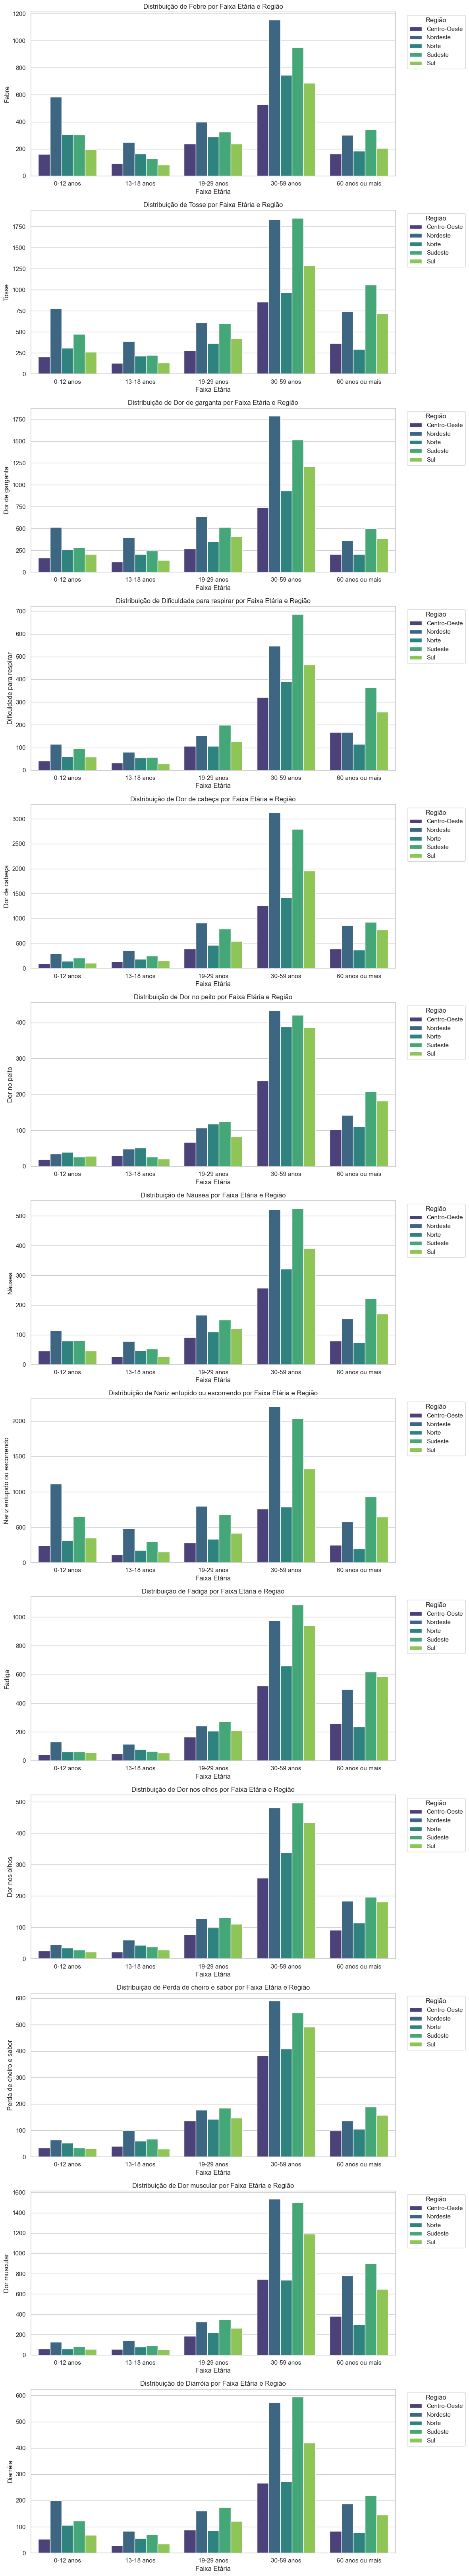

In [14]:
df_pandas = comparacao_sintomas_enntre_faixa_etaria.toPandas()

sintomas = [col for col in df_pandas.columns if col.endswith('_SIM')]
sintomas_descricao = {
    "FEBRE_SIM": "Febre",
    "TOSSE_SIM": "Tosse",
    "DOR_GARGANTA_SIM": "Dor de garganta",
    "DIFICULDADE_RESPIRAR_SIM": "Dificuldade para respirar",
    "DOR_CABECA_SIM": "Dor de cabeça",
    "DOR_PEITO_SIM": "Dor no peito",
    "NAUSEA_SIM": "Náusea",
    "NARIZ_ENTUPIDO_ESCORRENDO_SIM": "Nariz entupido ou escorrendo",
    "FADIGA_SIM": "Fadiga",
    "DOR_OLHOS_SIM": "Dor nos olhos",
    "PERDA_CHEIRO_SABOR_SIM": "Perda de cheiro e sabor",
    "DOR_MUSCULAR_SIM": "Dor muscular",
    "DIARREI_SIM": "Diarréia"
}

fig, axes = plt.subplots(len(sintomas), 1, figsize=(12, 5 * len(sintomas)))

for ax, sintoma in zip(axes, sintomas):
    sns.barplot(data=df_pandas, x='FAIXA_ETARIA', y=sintoma, hue='REGIAO', ax=ax, palette='viridis', errorbar=None)
    ax.set_title(f'Distribuição de {sintomas_descricao[sintoma]} por Faixa Etária e Região')
    ax.set_ylabel(sintomas_descricao[sintoma])
    ax.set_xlabel('Faixa Etária')
    ax.legend(title='Região', loc='upper right', bbox_to_anchor=(1.2, 1))

plt.tight_layout()
plt.show()

### Diferença na prevalência de sintomas graves entre pessoas acima de 60 anos e jovens adultos.

In [15]:
prevalencia_sintomas = spark.sql("""
        SELECT  
            CASE
                WHEN A002 BETWEEN 19 AND 29 THEN '19-29 anos'
                WHEN A002 BETWEEN 30 AND 59 THEN '30-59 anos'
                ELSE '60 anos ou mais'
            END AS FAIXA_ETARIA,
            COUNT(*) AS TOTAL_PESSOAS,
            ROUND((COUNT(CASE WHEN 1 IN(B0011, B0012, B0013, B0014, B0015, B0016, B0017, B0018, B0019, B00110, B00111, B00112, B00113) THEN 1 END) * 100.0 / COUNT(*)), 2) AS PREVALENCIA_SINTOMAS
        FROM PNAD_COVID
        GROUP BY FAIXA_ETARIA
        ORDER BY FAIXA_ETARIA
    """)
prevalencia_sintomas.show()

+---------------+-------------+--------------------+
|   FAIXA_ETARIA|TOTAL_PESSOAS|PREVALENCIA_SINTOMAS|
+---------------+-------------+--------------------+
|     19-29 anos|       173691|                3.72|
|     30-59 anos|       484396|                4.37|
|60 anos ou mais|       491110|                3.53|
+---------------+-------------+--------------------+



No bloco de código abaixo, um DataFrame Spark é convertido em pandas e um gráfico de barras é gerado para mostrar a prevalência de sintomas por faixa etária. Utilizando Seaborn, o gráfico apresenta a faixa etária no eixo X e a prevalência dos sintomas em percentual no eixo Y, com títulos e rótulos adequados, e as barras são coloridas com a paleta 'viridis'. A rotação dos rótulos do eixo X é ajustada para melhor legibilidade.

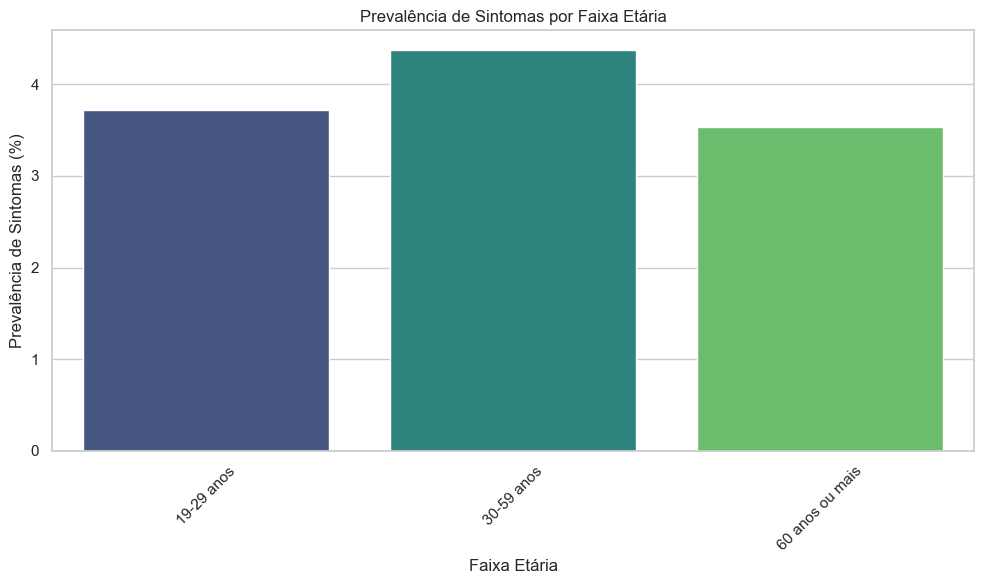

In [16]:
df_pandas = prevalencia_sintomas.toPandas()

plt.figure(figsize=(10, 6))
sns.barplot(data=df_pandas, x='FAIXA_ETARIA', y='PREVALENCIA_SINTOMAS', hue='FAIXA_ETARIA', palette='viridis', legend=False)

plt.title('Prevalência de Sintomas por Faixa Etária')
plt.xlabel('Faixa Etária')
plt.ylabel('Prevalência de Sintomas (%)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

## Características da População

### Proporção de pessoas com condições de saúde preexistentes

In [17]:
impacto_diferentes_regioes = spark.sql("""
        SELECT
            DIAGNOSTICO,
            CASE 
                WHEN UF IN (11, 12, 13, 14, 15, 16, 17) THEN 'Norte'
                WHEN UF IN (21, 22, 23, 24, 25, 26, 27, 28, 29) THEN 'Nordeste'
                WHEN UF IN (31, 32, 33, 35) THEN 'Sudeste'
                WHEN UF IN (41, 42, 43) THEN 'Sul'
                WHEN UF IN (50, 51, 52, 53) THEN 'Centro-Oeste'
                ELSE 'Outra'
            END AS REGIAO,
            COUNT(*) AS TOTAL_PESSOA,
            CAST(AVG(IDADE) AS INT) AS IDADE_MEDIA,
            SUM(QTD_TOTAL_DIAGNOSTICOS) AS QTD_TOTAL_DIAGNOSTICOS,
            SUM(HOMEM) AS QTD_TOTAL_HOMEM,
            SUM(MULHER) AS QTD_TOTAL_MULHER
        FROM (
                SELECT
                    'Diabetes' AS DIAGNOSTICO,
                    UF,
                    A002 AS IDADE,
                    CASE WHEN 1 IN (B0101) THEN 1 ELSE 0 END AS QTD_TOTAL_DIAGNOSTICOS,
                    CASE WHEN B0101 = 1 AND A003 = 1 THEN 1 ELSE 0 END AS HOMEM,
                    CASE WHEN B0101 = 1 AND A003 = 2 THEN 1 ELSE 0 END AS MULHER
                FROM PNAD_COVID
                UNION
                SELECT
                    'Hipertensão' AS DIAGNOSTICO,
                    UF,
                    A002 AS IDADE,
                    CASE WHEN 1 IN (B0102) THEN 1 ELSE 0 END AS QTD_TOTAL_DIAGNOSTICOS,
                    CASE WHEN B0102 = 1 AND A003 = 1 THEN 1 ELSE 0 END AS HOMEM,
                    CASE WHEN B0102 = 1 AND A003 = 2 THEN 1 ELSE 0 END AS MULHER
                FROM PNAD_COVID
                UNION
                SELECT
                    'Asma/bronquite/enfisema/doenças respiratória crônica ou doença de pulmão' AS DIAGNOSTICO,
                    UF,
                    A002 AS IDADE,
                    CASE WHEN 1 IN (B0103) THEN 1 ELSE 0 END AS QTD_TOTAL_DIAGNOSTICOS,
                    CASE WHEN B0103 = 1 AND A003 = 1 THEN 1 ELSE 0 END AS HOMEM,
                    CASE WHEN B0103 = 1 AND A003 = 2 THEN 1 ELSE 0 END AS MULHER
                FROM PNAD_COVID
                UNION
                SELECT
                    'Doenças do coração (infarto, angina, insuficiência cardíaca, arritmia)' AS DIAGNOSTICO,
                    UF,
                    A002 AS IDADE,
                    CASE WHEN 1 IN (B0104) THEN 1 ELSE 0 END AS QTD_TOTAL_DIAGNOSTICOS,
                    CASE WHEN B0104 = 1 AND A003 = 1 THEN 1 ELSE 0 END AS HOMEM,
                    CASE WHEN B0104 = 1 AND A003 = 2 THEN 1 ELSE 0 END AS MULHER
                FROM PNAD_COVID
                UNION
                SELECT
                    'Depressão' AS DIAGNOSTICO,
                    UF,
                    A002 AS IDADE,
                    CASE WHEN 1 IN (B0105) THEN 1 ELSE 0 END AS QTD_TOTAL_DIAGNOSTICOS,
                    CASE WHEN B0105 = 1 AND A003 = 1 THEN 1 ELSE 0 END AS HOMEM,
                    CASE WHEN B0105 = 1 AND A003 = 2 THEN 1 ELSE 0 END AS MULHER
                FROM PNAD_COVID
                UNION
                SELECT
                    'Câncer' AS DIAGNOSTICO,
                    UF,
                    A002 AS IDADE,
                    CASE WHEN 1 IN (B0106) THEN 1 ELSE 0 END AS QTD_TOTAL_DIAGNOSTICOS,
                    CASE WHEN B0106 = 1 AND A003 = 1 THEN 1 ELSE 0 END AS HOMEM,
                    CASE WHEN B0106 = 1 AND A003 = 2 THEN 1 ELSE 0 END AS MULHER
                FROM PNAD_COVID
            )
        GROUP BY DIAGNOSTICO, REGIAO
        ORDER BY DIAGNOSTICO, REGIAO
    """)
impacto_diferentes_regioes.show()

+--------------------+------------+------------+-----------+----------------------+---------------+----------------+
|         DIAGNOSTICO|      REGIAO|TOTAL_PESSOA|IDADE_MEDIA|QTD_TOTAL_DIAGNOSTICOS|QTD_TOTAL_HOMEM|QTD_TOTAL_MULHER|
+--------------------+------------+------------+-----------+----------------------+---------------+----------------+
|Asma/bronquite/en...|Centro-Oeste|        1052|         45|                   653|            316|             337|
|Asma/bronquite/en...|    Nordeste|        2387|         46|                  1456|            708|             748|
|Asma/bronquite/en...|       Norte|        1602|         43|                   912|            426|             486|
|Asma/bronquite/en...|     Sudeste|        1147|         47|                   731|            365|             366|
|Asma/bronquite/en...|         Sul|         863|         48|                   559|            273|             286|
|              Câncer|Centro-Oeste|         729|         53|    

No bloco de código abaixo, convertemos um DataFrame Spark em um DataFrame Pandas e utilizamos a biblioteca Seaborn para criar um gráfico de barras. O gráfico mostra a quantidade total de diagnósticos por região, com diferentes cores representando os tipos de diagnóstico. As configurações de título, rótulos dos eixos e legenda foram adicionadas para facilitar a interpretação dos dados.

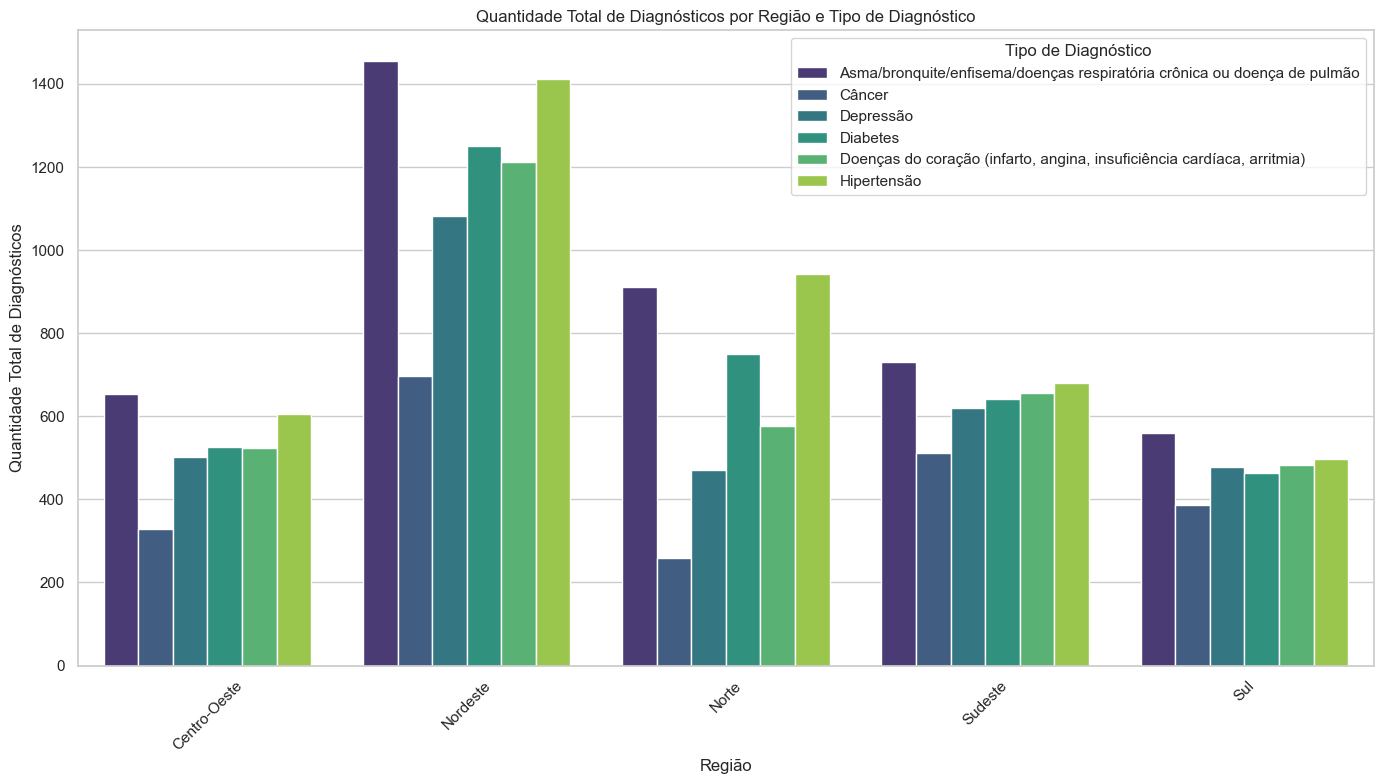

In [18]:
df_pandas = impacto_diferentes_regioes.toPandas()

plt.figure(figsize=(14, 8))
sns.barplot(data=df_pandas, x='REGIAO', y='QTD_TOTAL_DIAGNOSTICOS', hue='DIAGNOSTICO', palette='viridis')

plt.title('Quantidade Total de Diagnósticos por Região e Tipo de Diagnóstico')
plt.xlabel('Região')
plt.ylabel('Quantidade Total de Diagnósticos')
plt.legend(title='Tipo de Diagnóstico')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Comparação do impacto da COVID-19 entre regiões metropolitanas e áreas rurais.

In [19]:
comparacao_casos_por_area = spark.sql("""
        SELECT 
            CASE   
                WHEN V1022 = 1 THEN 'Capital'
                WHEN V1022 = 2 THEN 'Região Metropolitana, excluindo a capital'
                WHEN V1022 = 3 THEN 'Região Integrada de Desenvolvimento Econômico, excluindo a capital'
                WHEN V1022 = 4 THEN 'Unidade da Federação, excluindo a região metropolitana e a RIDE'
            END AS TIPO_AREA,
            CASE 
                WHEN UF IN (11, 12, 13, 14, 15, 16, 17) THEN 'Norte'
                WHEN UF IN (21, 22, 23, 24, 25, 26, 27, 28, 29) THEN 'Nordeste'
                WHEN UF IN (31, 32, 33, 35) THEN 'Sudeste'
                WHEN UF IN (41, 42, 43) THEN 'Sul'
                WHEN UF IN (50, 51, 52, 53) THEN 'Centro-Oeste'
                ELSE 'Outra'
            END AS REGIAO,
            COUNT(*) AS TOTAL_RESPOSTAS,
            SUM(CASE WHEN B0011 = 1 THEN 1 ELSE 0 END) AS QTD_CASOS_FEBRE,
            SUM(CASE WHEN B0012 = 1 THEN 1 ELSE 0 END) AS QTD_CASOS_TOSSE,
            SUM(CASE WHEN B0014 = 1 THEN 1 ELSE 0 END) AS QTD_CASOS_DIFICULDADE_RESPIRAR,
            SUM(CASE WHEN B0015 = 1 THEN 1 ELSE 0 END) AS QTD_CASOS_DOR_CABECA,
            SUM(CASE WHEN B0016 = 1 THEN 1 ELSE 0 END) AS QTD_CASPS_DOR_PEITO,
            SUM(CASE WHEN B005 = 1 THEN 1 ELSE 0 END) AS TOTAL_INTERNADOS
        FROM PNAD_COVID
        GROUP BY TIPO_AREA, REGIAO
        ORDER BY TIPO_AREA, REGIAO
    """)
comparacao_casos_por_area.show()

+--------------------+------------+---------------+---------------+---------------+------------------------------+--------------------+-------------------+----------------+
|           TIPO_AREA|      REGIAO|TOTAL_RESPOSTAS|QTD_CASOS_FEBRE|QTD_CASOS_TOSSE|QTD_CASOS_DIFICULDADE_RESPIRAR|QTD_CASOS_DOR_CABECA|QTD_CASPS_DOR_PEITO|TOTAL_INTERNADOS|
+--------------------+------------+---------------+---------------+---------------+------------------------------+--------------------+-------------------+----------------+
|             Capital|Centro-Oeste|         103602|           1016|           1584|                           598|                1991|                391|              86|
|             Capital|    Nordeste|         227918|           1888|           3001|                           810|                3850|                564|             114|
|             Capital|       Norte|         111279|           1362|           1710|                           614|                2103|

No bloco de código abaixo, convertemos um DataFrame Spark em um DataFrame Pandas e utilizamos a biblioteca Seaborn para criar um gráfico de barras. O gráfico exibe o total de internados por região, diferenciando os tipos de área (Capital e Região Metropolitana) com cores distintas. As configurações de título e rótulos dos eixos foram adicionadas para facilitar a interpretação dos dados.

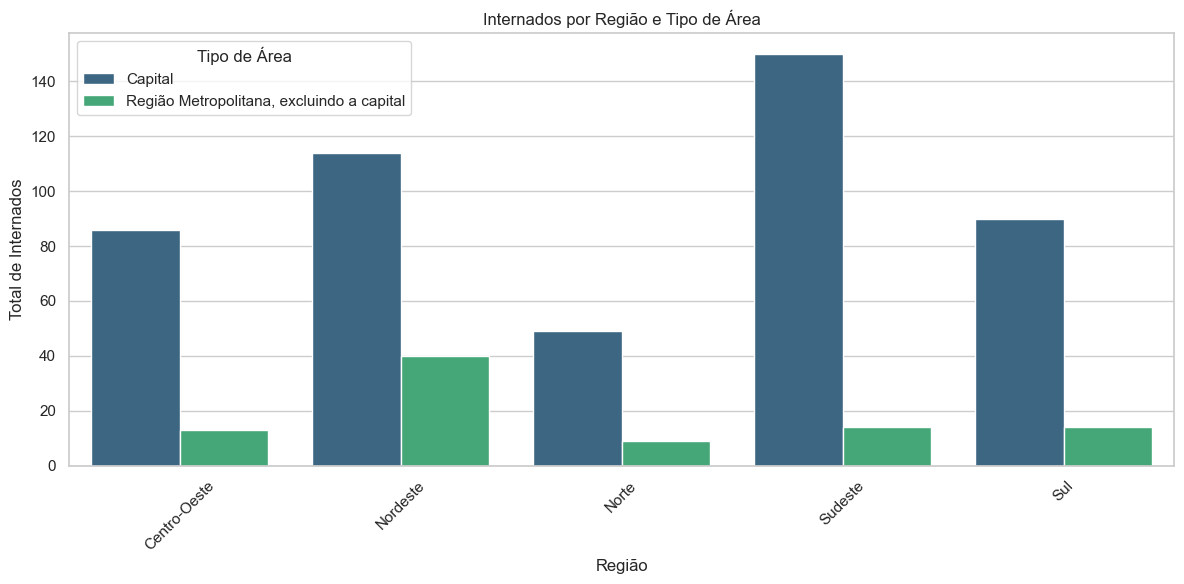

In [20]:
df_pandas = comparacao_casos_por_area.toPandas()

plt.figure(figsize=(12, 6))
sns.barplot(data=df_pandas, x='REGIAO', y='TOTAL_INTERNADOS', hue='TIPO_AREA', palette='viridis')

plt.title('Internados por Região e Tipo de Área')
plt.xlabel('Região')
plt.ylabel('Total de Internados')
plt.legend(title='Tipo de Área')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Características Econômicas da Sociedade

### Total de pessoas foram afastadas do trabalho por motivos relacionados à COVID-19.

In [21]:
total_pessoas_afastadas = spark.sql("""
        SELECT COUNT(*) AS TOTAL_AFASTADOS
        FROM PNAD_COVID
        WHERE C002 = 1 AND C003 = 1
    """)
total_pessoas_afastadas.show()

+---------------+
|TOTAL_AFASTADOS|
+---------------+
|          26044|
+---------------+



Um total de **26.044 pessoas** foram afastadas do trabalho por motivos relacionados à COVID-19, mostrando o impacto da pandemia nas atividades laborais e na necessidade de interrupções temporárias no trabalho.

### Diferença de renda entre trabalhadores formais e informais durante a pandemia.

In [22]:
diferenca_renda_trabalhadores_formais_e_informais = spark.sql("""
        WITH CLASSIFICACAO_TRABALHO AS (
            SELECT
                UF,
                COALESCE(CAST(C01012 AS DECIMAL), 0) + COALESCE(CAST(C01022 AS DECIMAL), 0) AS RENDA_TOTAL,
                CASE 
                    WHEN C007B IN (1, 2) THEN 'Formal'
                    WHEN C007B = 3 AND C001 = 1 THEN 'Informal'
                    ELSE 'Outro'
                END AS TIPO_TRABALHO
            FROM
                PNAD_COVID
            WHERE C0101 = 1 OR C0102 = 2
        ),
        
        RENDA_EFETIVA AS (
            SELECT UF, TIPO_TRABALHO, RENDA_TOTAL
            FROM CLASSIFICACAO_TRABALHO
            WHERE TIPO_TRABALHO IN ('Formal', 'Informal')
                 
        )
        
        SELECT
            CASE 
                WHEN UF IN (11, 12, 13, 14, 15, 16, 17) THEN 'Norte'
                WHEN UF IN (21, 22, 23, 24, 25, 26, 27, 28, 29) THEN 'Nordeste'
                WHEN UF IN (31, 32, 33, 35) THEN 'Sudeste'
                WHEN UF IN (41, 42, 43) THEN 'Sul'
                WHEN UF IN (50, 51, 52, 53) THEN 'Centro-Oeste'
                ELSE 'Outra'
            END AS REGIAO,    
            TIPO_TRABALHO,
            COUNT(*) AS TOTAL_TRABALHADORES,
            AVG(RENDA_TOTAL) AS RENDA_MEDIA,
            MIN(RENDA_TOTAL) AS RENDA_MINIMA,
            MAX(RENDA_TOTAL) AS RENDA_MAXIMA
        FROM RENDA_EFETIVA
        GROUP BY REGIAO, TIPO_TRABALHO
        ORDER BY REGIAO, TIPO_TRABALHO
    """)
diferenca_renda_trabalhadores_formais_e_informais.show()

+------------+-------------+-------------------+-----------+------------+------------+
|      REGIAO|TIPO_TRABALHO|TOTAL_TRABALHADORES|RENDA_MEDIA|RENDA_MINIMA|RENDA_MAXIMA|
+------------+-------------+-------------------+-----------+------------+------------+
|Centro-Oeste|       Formal|              26658|  2723.9829|         150|       42000|
|Centro-Oeste|     Informal|               8755|  1708.0248|          30|      100001|
|    Nordeste|       Formal|              41340|  2129.9269|          80|      100000|
|    Nordeste|     Informal|              23121|  1073.0782|          10|       50000|
|       Norte|       Formal|              19891|  2438.8135|         100|       39000|
|       Norte|     Informal|               8564|  1371.9229|          20|       25000|
|     Sudeste|       Formal|              69696|  2596.6786|          75|       80000|
|     Sudeste|     Informal|              18696|  1717.7587|          30|       65000|
|         Sul|       Formal|              4

No bloco de código abaixo, convertemos um DataFrame Spark em um DataFrame Pandas e utilizamos a biblioteca Seaborn para criar um gráfico de barras agrupadas. O gráfico mostra o total de trabalhadores (tanto formais quanto informais) por região. As cores diferentes representam os tipos de trabalho, facilitando a comparação visual. As configurações de título, rótulos dos eixos e legenda foram adicionadas para melhorar a clareza dos dados apresentados.

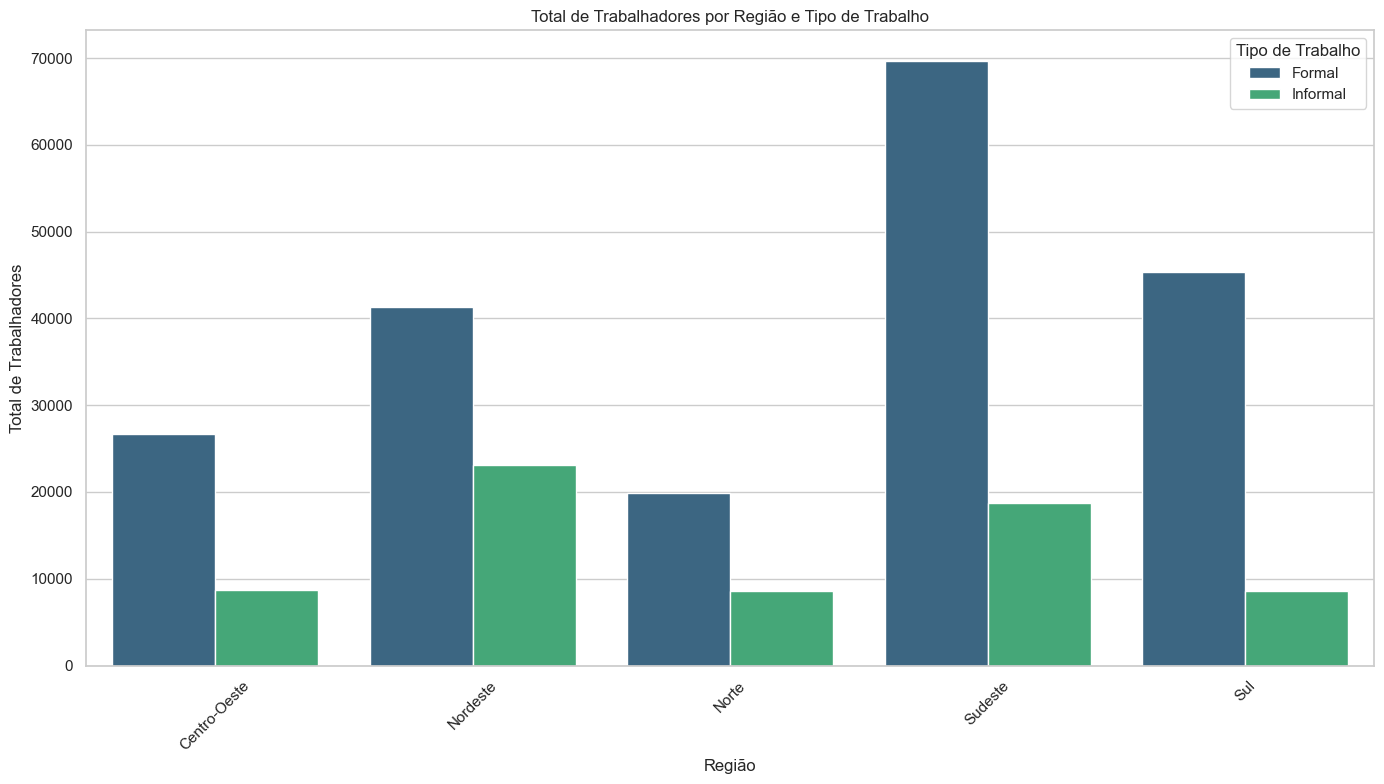

In [23]:
df_pandas = diferenca_renda_trabalhadores_formais_e_informais.toPandas()

plt.figure(figsize=(14, 8))
sns.barplot(data=df_pandas, x='REGIAO', y='TOTAL_TRABALHADORES', hue='TIPO_TRABALHO', palette='viridis')

plt.title('Total de Trabalhadores por Região e Tipo de Trabalho')
plt.xlabel('Região')
plt.ylabel('Total de Trabalhadores')
plt.legend(title='Tipo de Trabalho')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Proporção da população que recebeu auxílio emergencial, segmentada por estado.

In [24]:
proporcao_populacao_recebeu_auxilio = spark.sql("""
        WITH auxilio_emergencial AS (
            SELECT 
                UF,
                COUNT(*) AS QTD_TOTAL_POPULACAO,
                SUM(CASE WHEN D0051 = 1 THEN 1 ELSE 0 END) AS QTD_TOTAL_RECEBEU_AUXILIO
            FROM PNAD_COVID
            GROUP BY UF
        )

        SELECT 
            CASE
                WHEN UF = 11 THEN 'Rondônia'
                WHEN UF = 12 THEN 'Acre'
                WHEN UF = 13 THEN 'Amazonas'
                WHEN UF = 14 THEN 'Roraima'
                WHEN UF = 15 THEN 'Pará'
                WHEN UF = 16 THEN 'Amapá'
                WHEN UF = 17 THEN 'Tocantins'
                WHEN UF = 21 THEN 'Maranhão'
                WHEN UF = 22 THEN 'Piauí'
                WHEN UF = 23 THEN 'Ceará'
                WHEN UF = 24 THEN 'Rio Grande do Norte'
                WHEN UF = 25 THEN 'Paraíba'
                WHEN UF = 26 THEN 'Pernambuco'
                WHEN UF = 27 THEN 'Alagoas'
                WHEN UF = 28 THEN 'Sergipe'
                WHEN UF = 29 THEN 'Bahia'
                WHEN UF = 31 THEN 'Minas Gerais'
                WHEN UF = 32 THEN 'Espírito Santo'
                WHEN UF = 33 THEN 'Rio de Janeiro'
                WHEN UF = 35 THEN 'São Paulo'
                WHEN UF = 41 THEN 'Paraná'
                WHEN UF = 42 THEN 'Santa Catarina'
                WHEN UF = 43 THEN 'Rio Grande do Sul'
                WHEN UF = 50 THEN 'Mato Grosso do Sul'
                WHEN UF = 51 THEN 'Mato Grosso'
                WHEN UF = 52 THEN 'Goiás'
                WHEN UF = 53 THEN 'Distrito Federal'
            END AS UNIDADE_FEDERACAO,
            CASE 
                WHEN UF IN (11, 12, 13, 14, 15, 16, 17) THEN 'Norte'
                WHEN UF IN (21, 22, 23, 24, 25, 26, 27, 28, 29) THEN 'Nordeste'
                WHEN UF IN (31, 32, 33, 35) THEN 'Sudeste'
                WHEN UF IN (41, 42, 43) THEN 'Sul'
                WHEN UF IN (50, 51, 52, 53) THEN 'Centro-Oeste'
                ELSE 'Outra'
            END AS REGIAO,
            QTD_TOTAL_POPULACAO,
            QTD_TOTAL_RECEBEU_AUXILIO,
            CAST((QTD_TOTAL_RECEBEU_AUXILIO / NULLIF(QTD_TOTAL_POPULACAO, 0)) * 100 AS INT) AS PROPORCAO
        FROM 
            auxilio_emergencial
        GROUP BY UNIDADE_FEDERACAO, REGIAO, QTD_TOTAL_POPULACAO, QTD_TOTAL_RECEBEU_AUXILIO
        ORDER BY PROPORCAO DESC
    """)
proporcao_populacao_recebeu_auxilio.show()

+-------------------+------------+-------------------+-------------------------+---------+
|  UNIDADE_FEDERACAO|      REGIAO|QTD_TOTAL_POPULACAO|QTD_TOTAL_RECEBEU_AUXILIO|PROPORCAO|
+-------------------+------------+-------------------+-------------------------+---------+
|              Amapá|       Norte|               7677|                     5338|       69|
|            Alagoas|    Nordeste|              34450|                    23492|       68|
|           Maranhão|    Nordeste|              61200|                    41051|       67|
|               Pará|       Norte|              35764|                    23731|       66|
|              Piauí|    Nordeste|              25137|                    16091|       64|
|              Bahia|    Nordeste|              51310|                    32955|       64|
|           Amazonas|       Norte|              31355|                    20081|       64|
|              Ceará|    Nordeste|              50536|                    32285|       63|

No bloco de código acima, após converter o DataFrame Spark em um DataFrame Pandas, filtramos os 10 estados com a maior proporção de pessoas que receberam auxílio emergencial. Em seguida, criamos um gráfico de barras com esses dados, onde o eixo y representa a proporção e o eixo x representa as unidades da federação. As configurações de título e rótulos dos eixos foram ajustadas para garantir uma visualização clara e legível.

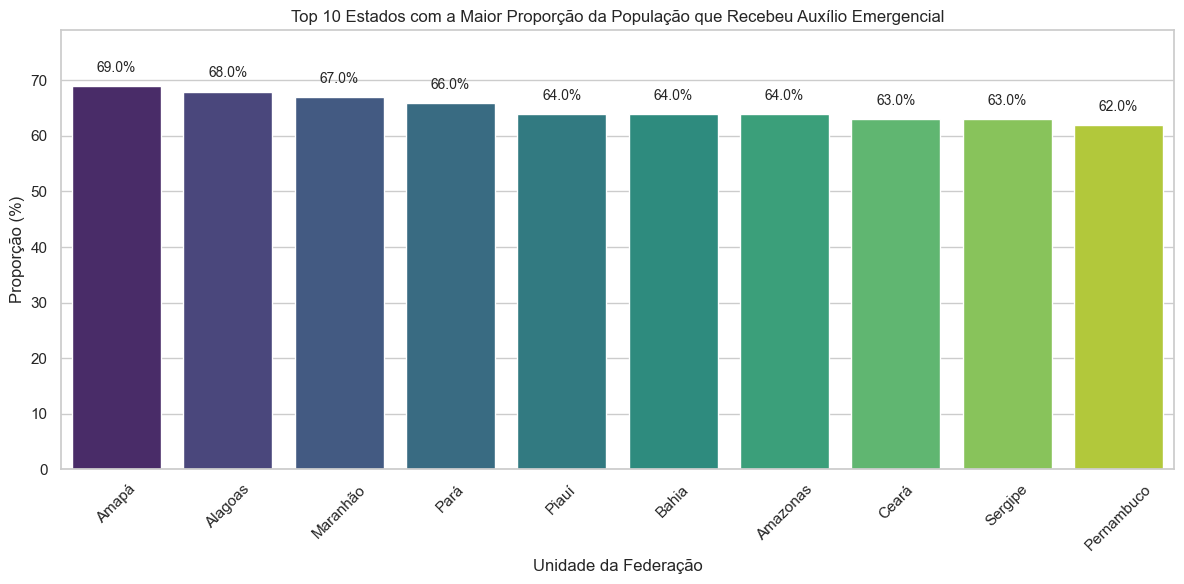

In [25]:
df_pandas = proporcao_populacao_recebeu_auxilio.toPandas()

top_10 = df_pandas.nlargest(10, 'PROPORCAO')

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_10, x='UNIDADE_FEDERACAO', y='PROPORCAO', hue='UNIDADE_FEDERACAO', palette='viridis', legend=False)

plt.title('Top 10 Estados com a Maior Proporção da População que Recebeu Auxílio Emergencial')
plt.xlabel('Unidade da Federação')
plt.ylabel('Proporção (%)')
plt.xticks(rotation=45)

maximo_y = top_10['PROPORCAO'].max()
plt.ylim(0, maximo_y + 10)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}%', (p.get_x() + p.get_width() / 2., p.get_height() + 2), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Desafios na modelagem de dados
- **Dicionário PNAD:** O dicionário é confuso. É extenso e nada intuitivo. Os códigos devem ser interpretados corretamente. É demandado um bom tempo de análise do material para um maior entendimento, assim compreendemos de forma clara cada código para cada pergunta.
- **Mudança entre os meses:** Há diferenças entre os meses que podem passar despercebidas, porém devem ser notadas numa análise mais severa. O dicionário deve acompanhar o período da análise, caso contrário, algumas perguntas não contemplarão o código da em um dos relatórios.
- **Estrutura das respostas:** As respostas são codificadas, tornando-as a nossa PK. O lado ruim é que de novo, pode demandar um bom tempo buscando determinadas questões.
- **Volume de dados:** Grande volume de dados, e é por este motivo o processamento de dados com PySpark fica com mais fluidez
- **Valores null:** Existem vários campos nulos pois nem todos os entrevistados respondem a todas as perguntas, o que é totalmente comum nessa natureza de relatório. O desafio é como lidar com os campos nulos. Qualquer ação pode alterar o resultado bruscamente.

# Organização no Banco de Dados
A estrutura atual coloca cada código em coluna, fato que é comum em questionários. Existem algumas vantagens como consultas diretas sobre perguntas específicas. 
Pensando em organização do banco de dados, a estrutura do PNAD COVID poderia ser transposta, tendo uma coluna com os códigos de todas as perguntas realizadas. Dessa maneira, teríamos:
- **Facilidade na análise exploratória:** Possibilidade de agrupar e comparar perguntas de maneira rápida e eficiente, especialmente se está interessado em observar padrões entre diferentes perguntas.
- **Organização relacional:** Em bases de dados relacionais, esse formato poderia melhorar a eficiência de consultas em que o foco é a relação entre diferentes perguntas/respostas ao longo do tempo, sem aumentar excessivamente o número de colunas.
- **Análises temporais e comparativas:** Ao organizar as perguntas em linhas, seria mais fácil comparar o comportamento de respostas similares ao longo dos meses.

É claro que existem vantagens e desvantagens para as duas questões (Enquanto um traz mais colunas, outro traz mais linhas), porém por se tratar de um banco de dados, precisamos pensar em performance e, quanto mais colunas, manipular grandes tabelas com muitas colunas pode sobrecarregar a memória e reduzir a eficiência do processamento.
Como estamos lidando com somente 3 meses, optamos por seguir com o formato atual visto que nossa análise é específica.

# Medidas do Hospital para Novo Surto de COVID-19

## Cenário 1: Surto de COVID-19 dentro do próprio hospital

**Desafios:**
- **Contaminação cruzada:** O maior risco é a disseminação do vírus entre pacientes e profissionais de saúde, afetando tanto pacientes com COVID-19 quanto os que estão sendo tratados por outras enfermidades.
- **Proteção dos profissionais de saúde:** Profissionais de saúde podem ser infectados, o que compromete a capacidade de atendimento.
- **Manutenção das operações normais:** O hospital ainda precisa cuidar de pacientes com outras doenças, cirurgias e procedimentos essenciais.

**Estratégias de Ação:**
1. **Isolamento rápido de áreas afetadas:**
    - Identificar imediatamente os pacientes infectados e isolar setores onde o surto tenha ocorrido.
    - Criar zonas de tratamento específicas para pacientes com COVID, separando-os fisicamente dos outros.

2. **Controle rigoroso de infecção:**
    - Implementar protocolos rígidos de higienização para profissionais, pacientes e equipamentos, com uso obrigatório de EPI (máscaras, luvas, aventais, etc.).
    - Limitar visitas e o trânsito de pessoas entre alas.

3. **Monitoramento de pacientes e funcionários:**
    - Testar regularmente pacientes e profissionais de saúde para identificar novos casos precocemente.
    - Estabelecer equipes rotativas, de modo a minimizar o impacto de afastamentos.

4. **Flexibilidade no fluxo de atendimento:**
    - Redirecionar pacientes com enfermidades menos graves para teleconsultas ou clínicas ambulatoriais, preservando os recursos do hospital.
    - Priorizar o atendimento emergencial e ajustar cirurgias eletivas conforme necessário.

5. **Comunicação clara e transparente:**
    - Manter os funcionários informados sobre os protocolos de segurança e as ações de resposta.
    - Esclarecer aos pacientes e suas famílias sobre as medidas adotadas para garantir segurança.

## Cenário 2: Surto de COVID-19 na cidade (volume maior)

**Desafios:**
- **Sobrecarga de pacientes:** O volume de pacientes com COVID-19 aumenta, sobrecarregando os recursos e profissionais de saúde.
- **Capacidade hospitalar:** O hospital precisa manter seu funcionamento sem comprometer o atendimento a pacientes com outras enfermidades.
- **Gerenciamento de recursos:** Uso otimizado de leitos, equipamentos e medicamentos, evitando escassez.

**Estratégias de Ação:**

1. **Criação de áreas dedicadas ao COVID:**
    - Separar setores exclusivos para o tratamento de pacientes com COVID, como UTIs e enfermarias, para evitar a propagação entre pacientes com outras enfermidades.
    - Implementar triagem de casos na entrada do hospital para classificar a gravidade dos sintomas e evitar aglomeração desnecessária.

2. **Ampliação da capacidade de leitos e pessoal:**
    - Se possível, ativar leitos de contingência, como áreas externas ou tendas temporárias, para lidar com o aumento no número de pacientes.
    - Contratar profissionais temporários ou transferir equipes de outras unidades menos afetadas.

3. **Telemedicina e redirecionamento de atendimentos leves:**
    - Incentivar o uso de telemedicina para casos leves ou consultas de rotina, liberando espaço no hospital para os pacientes mais graves.
    - Criar parcerias com unidades de saúde menores para redirecionar atendimentos menos críticos.

4. **Uso eficiente de EPI e medicamentos:**
    - Implementar planos para garantir a disponibilidade contínua de EPIs e medicamentos, evitando desperdício e gerenciando estoques de forma eficaz.

5. **Coordenação com autoridades locais e regionais:**
    - Estabelecer comunicação constante com autoridades de saúde e outros hospitais para transferências de pacientes ou compartilhamento de recursos.
    - Ativar planos de contingência para leitos de UTI em casos extremos, como transferência para outras cidades ou hospitais próximos.

6. **Comunicação e orientação à população:**
    - Fornecer informações claras para a população sobre os sintomas e quando procurar o hospital, evitando sobrecarga desnecessária de casos leves.

## Resumo

Nos dois cenários, o foco está na rápida identificação e isolamento dos casos de COVID-19, no controle de infecções e na adaptação da estrutura do hospital para lidar com o volume de pacientes. No cenário de surto interno, o desafio é evitar a disseminação dentro do hospital, enquanto no surto da cidade, a questão principal é gerenciar a capacidade e os recursos hospitalares diante de um número crescente de pacientes.